In [5]:
#standard imports

import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn
import numpy as np
import scipy
import os

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#makes plots appear in the notebook
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

from datetime import datetime
import requests
from io import StringIO

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
import lasio


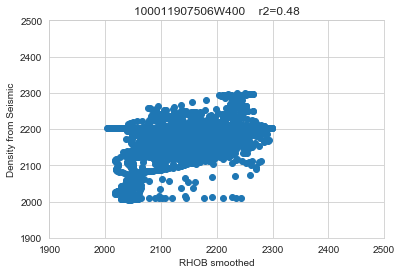

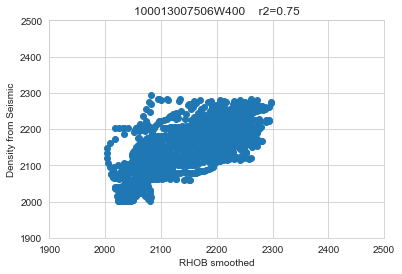

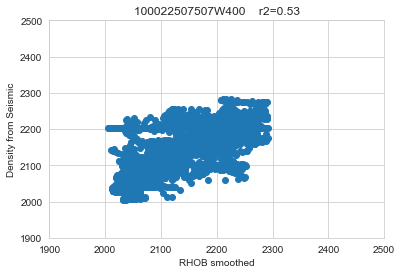

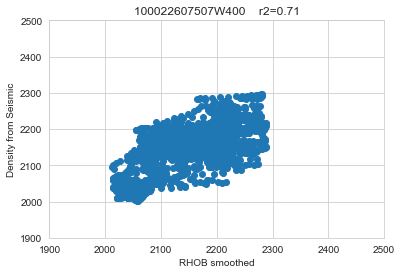

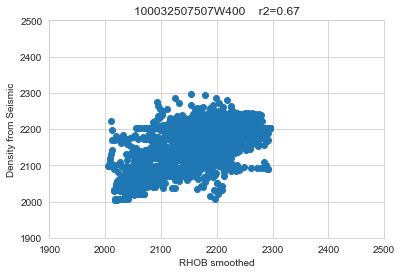

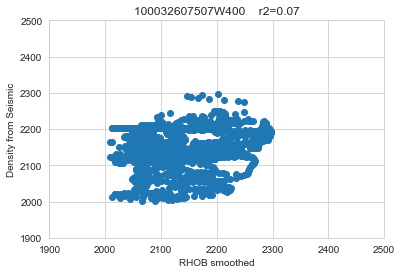

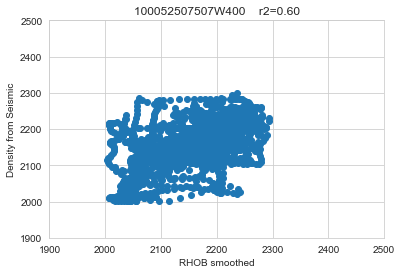

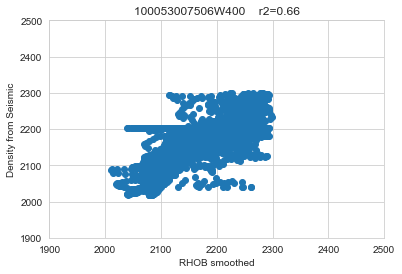

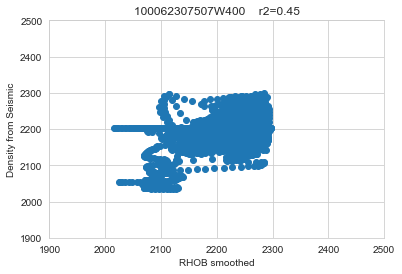

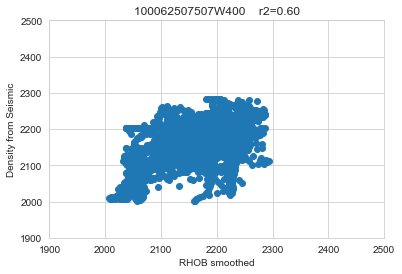

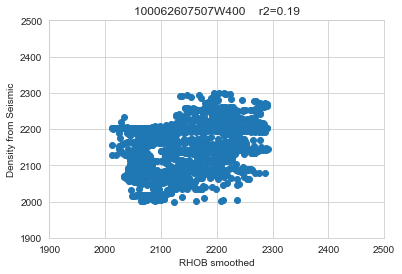

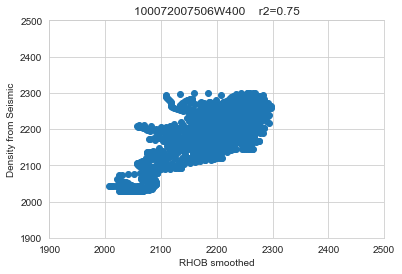

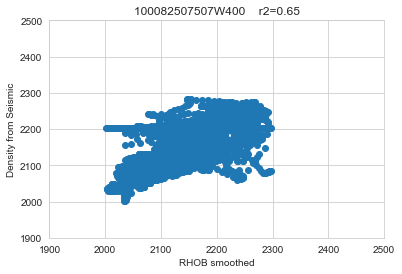

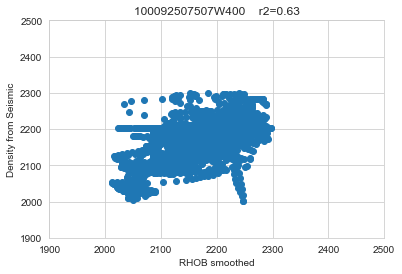

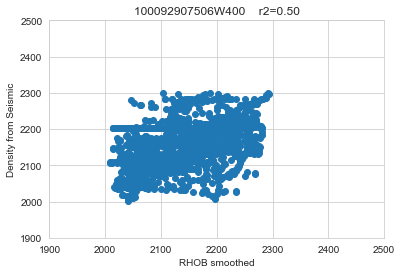

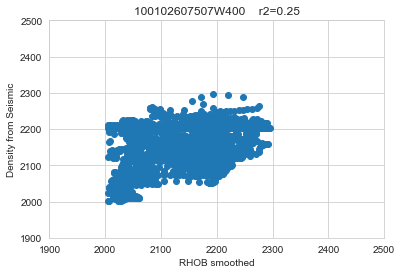

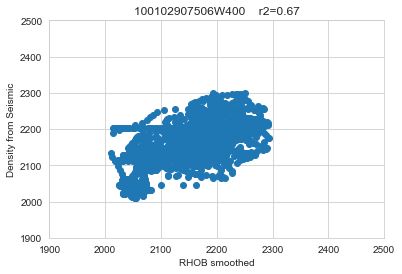

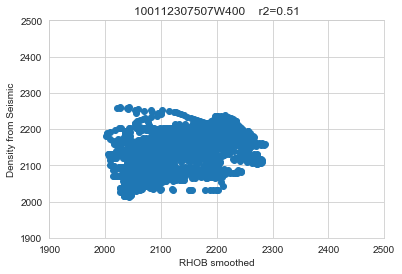

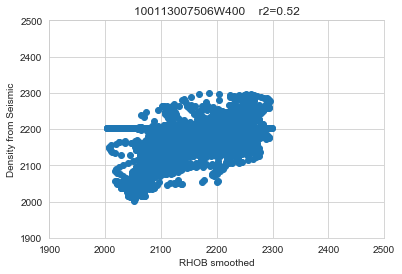

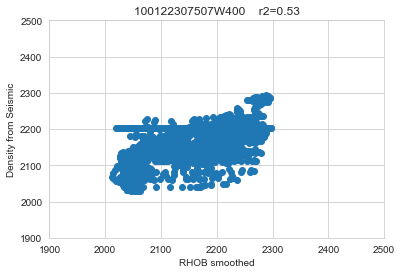

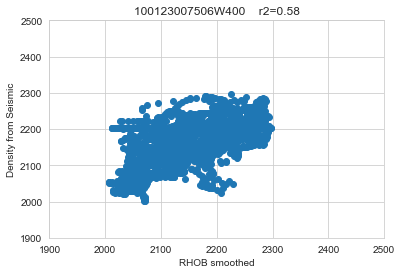

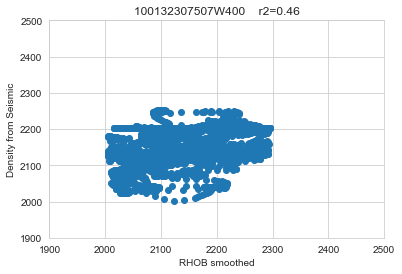

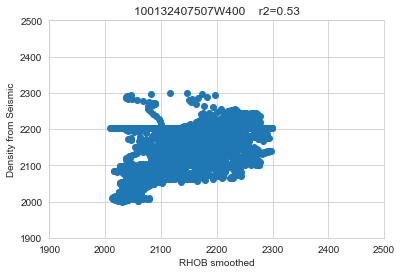

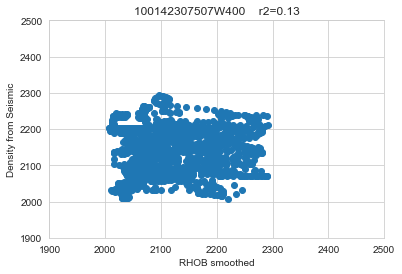

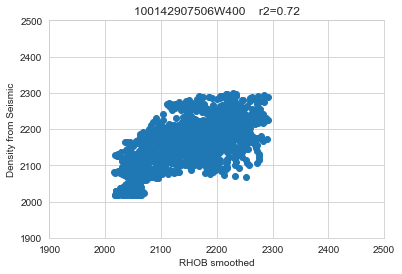

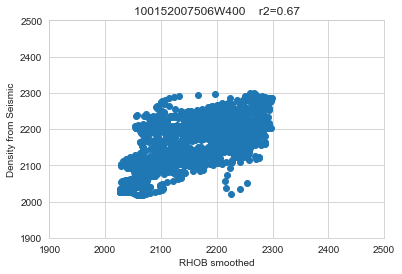

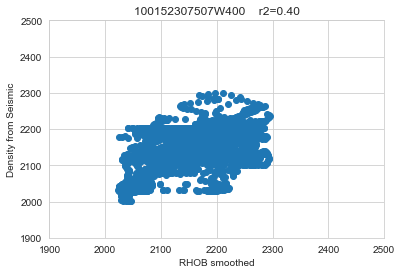

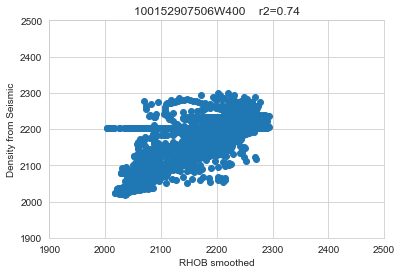

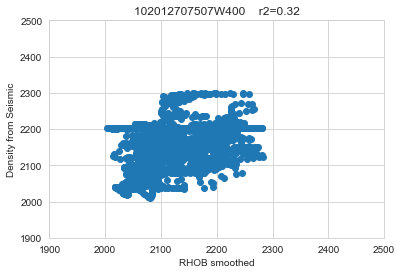

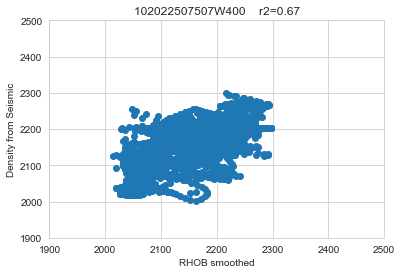

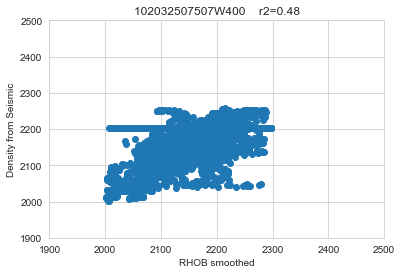

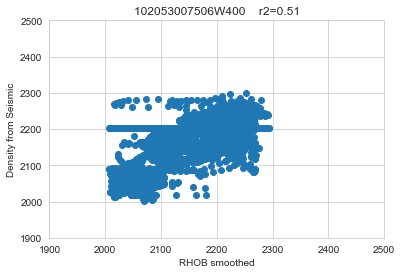

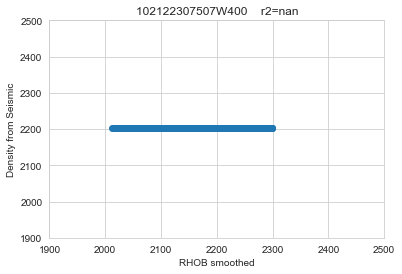

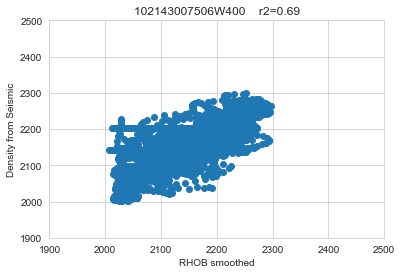

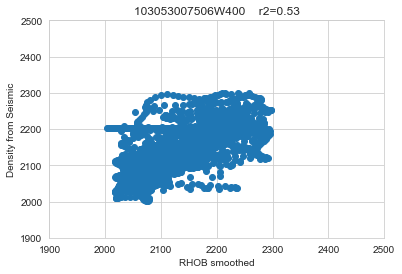

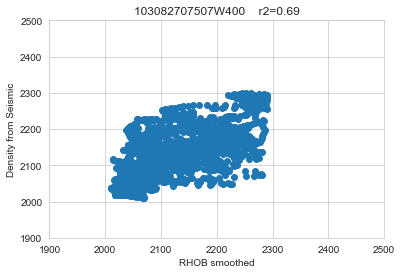

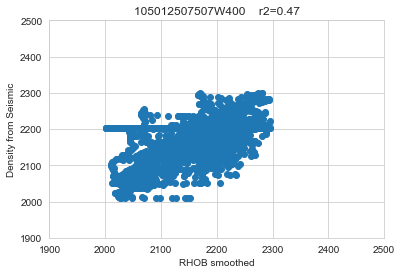

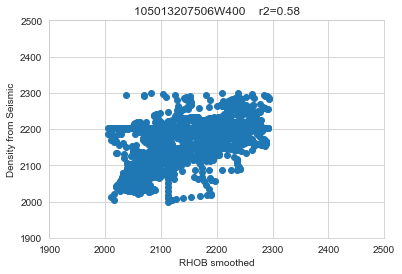

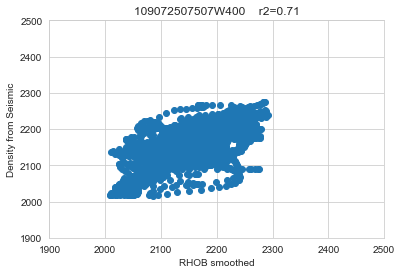

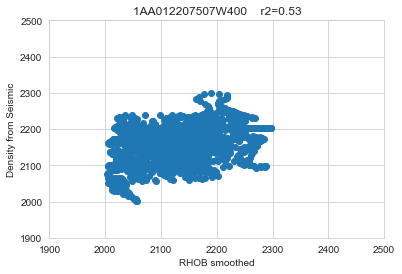

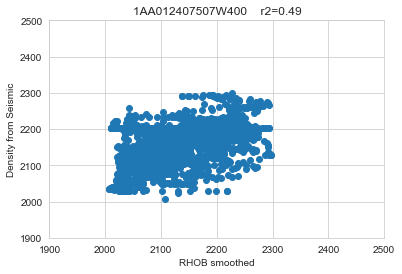

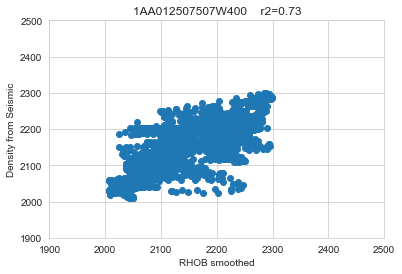

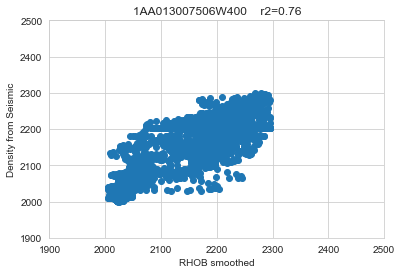

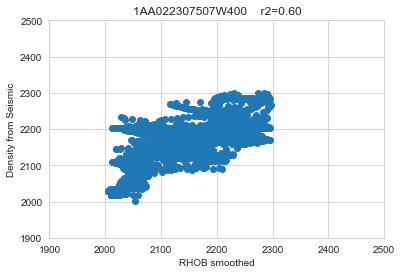

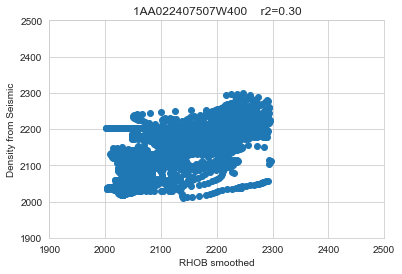

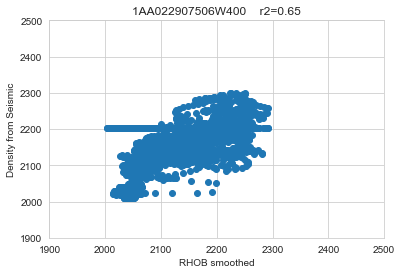

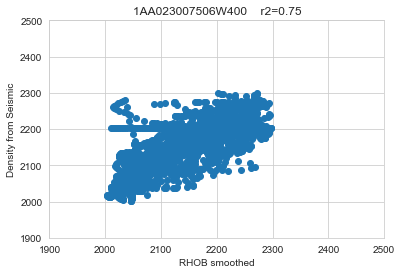

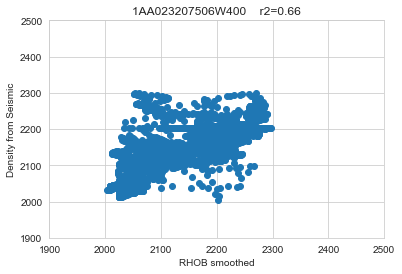

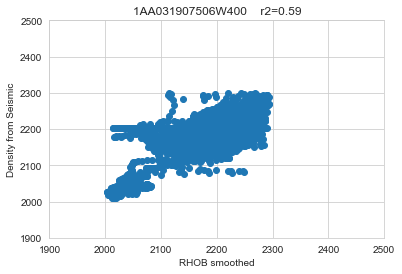

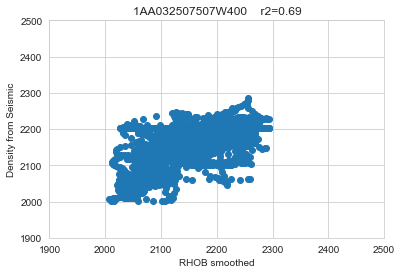

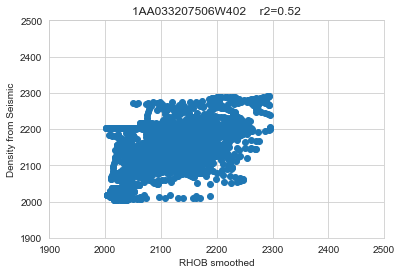

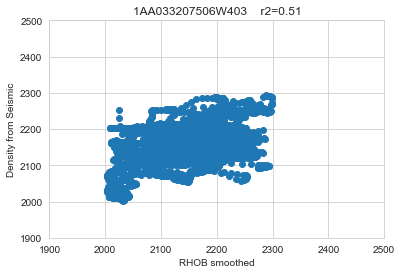

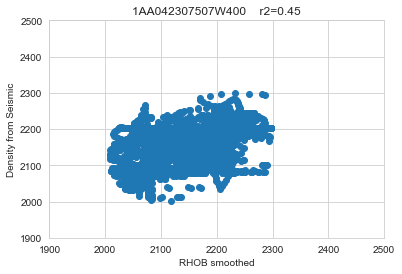

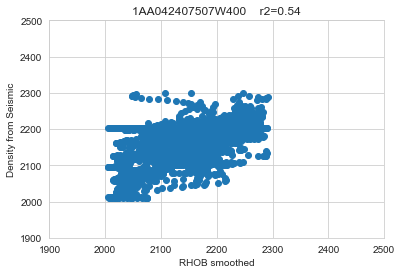

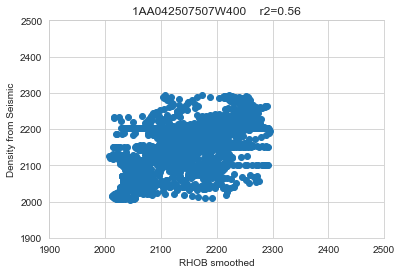

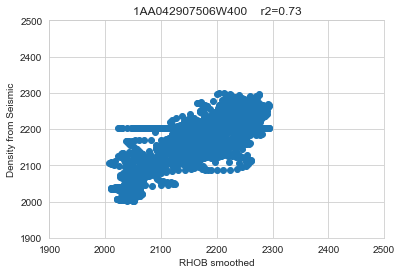

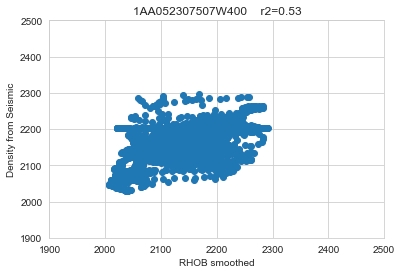

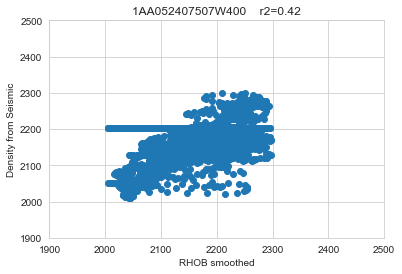

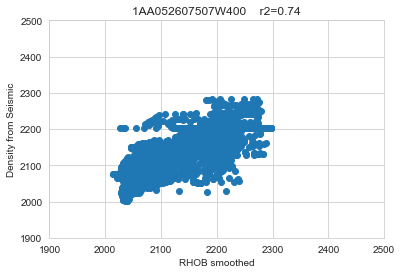

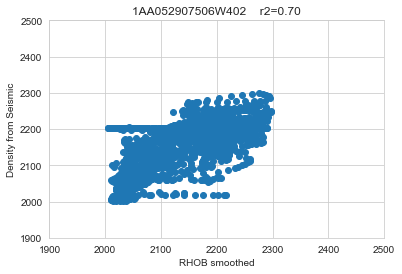

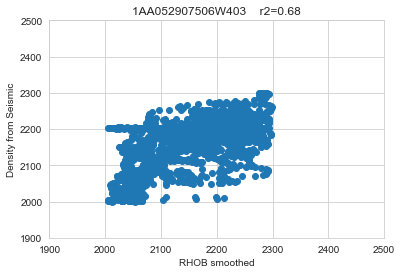

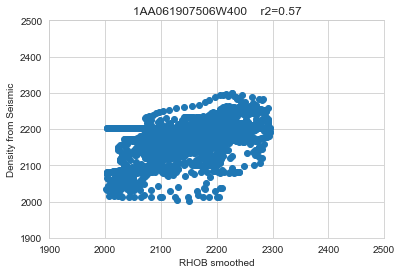

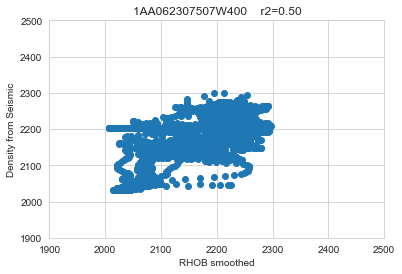

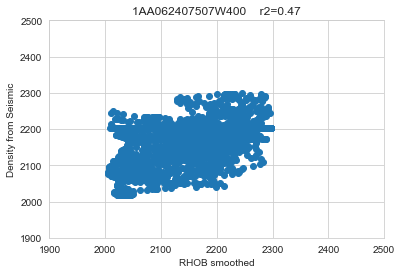

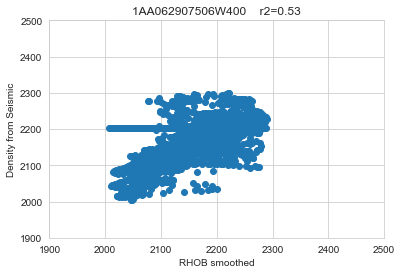

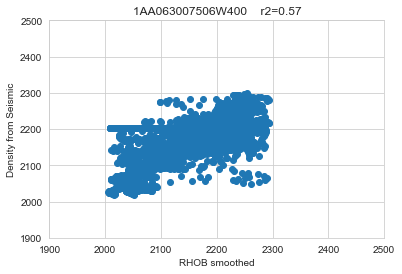

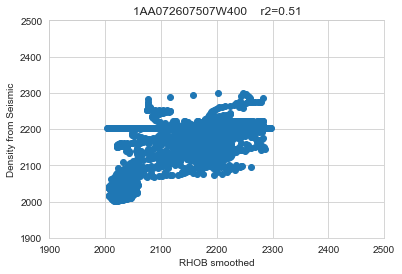

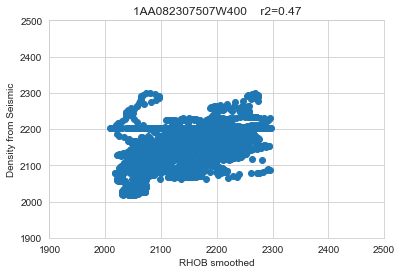

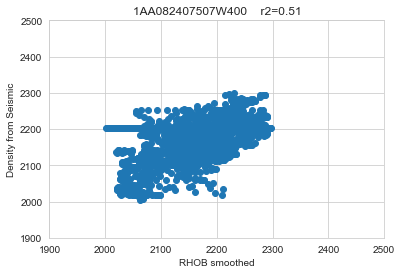

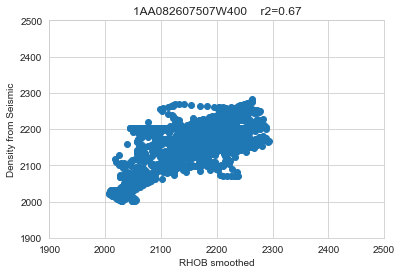

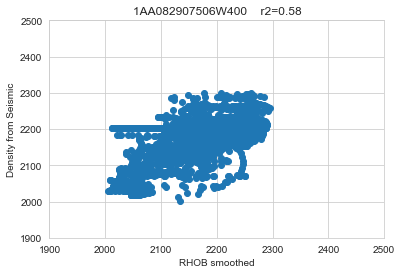

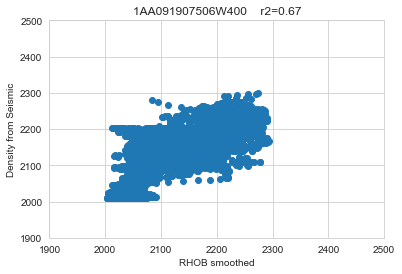

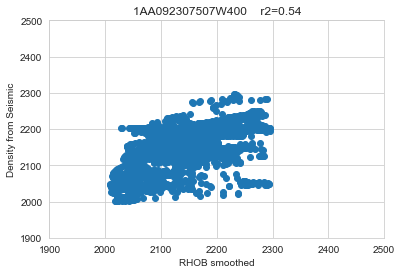

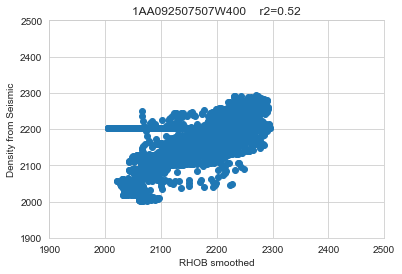

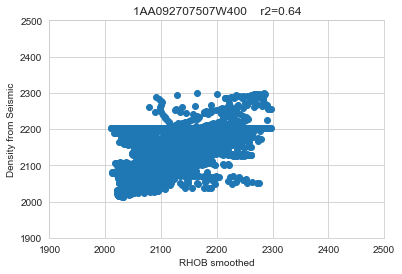

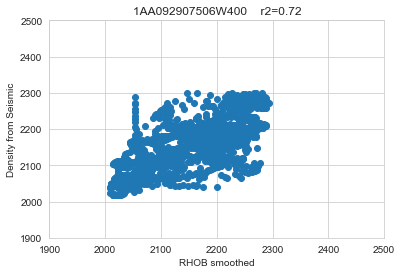

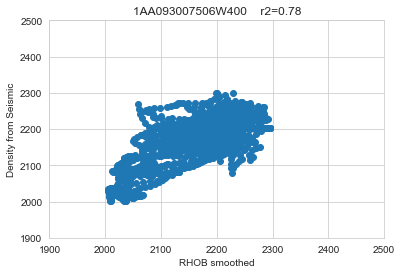

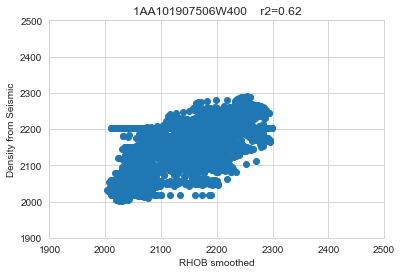

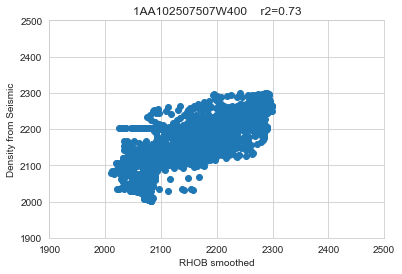

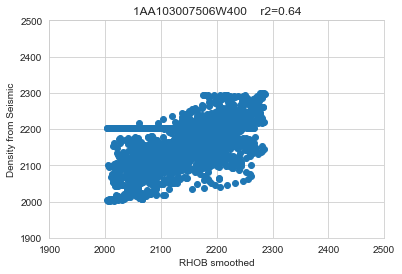

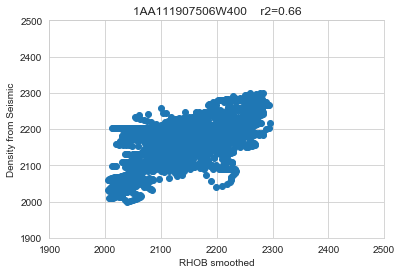

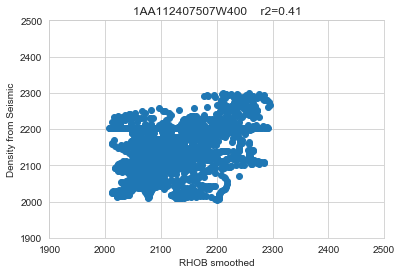

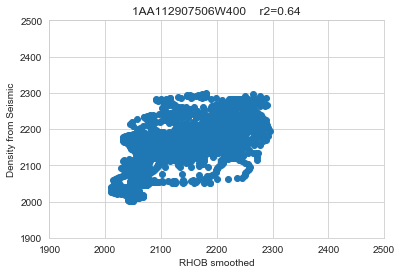

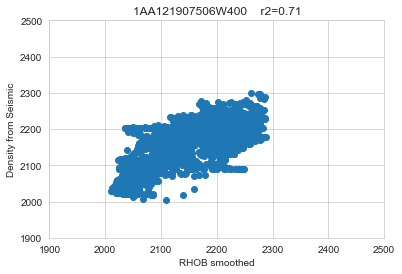

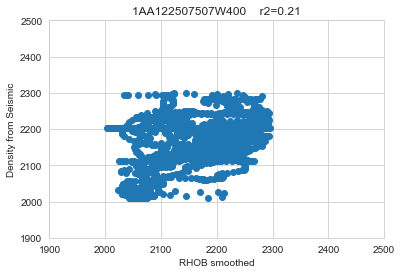

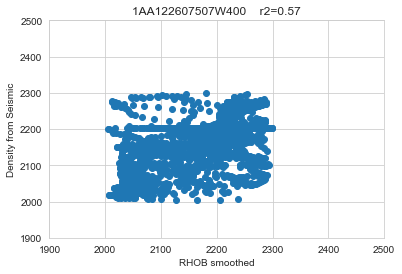

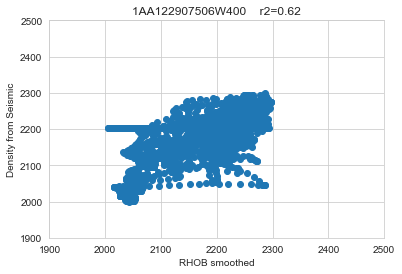

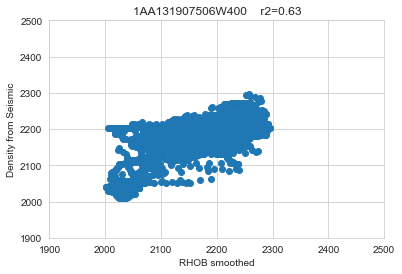

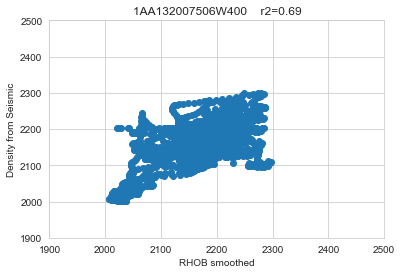

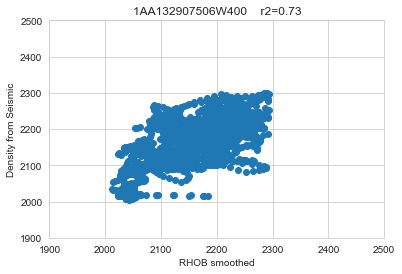

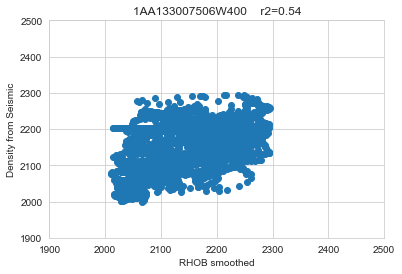

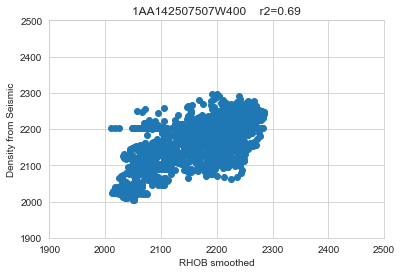

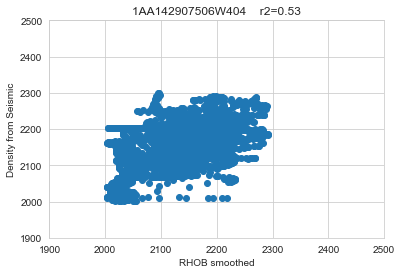

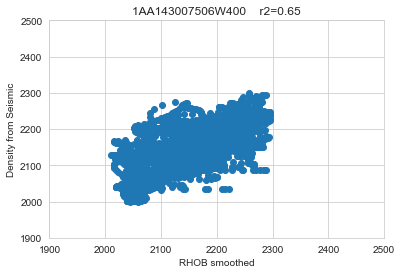

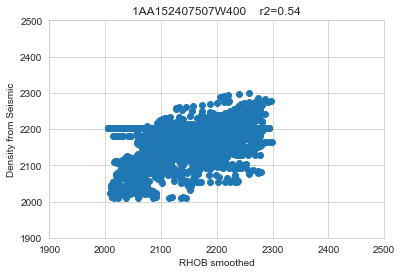

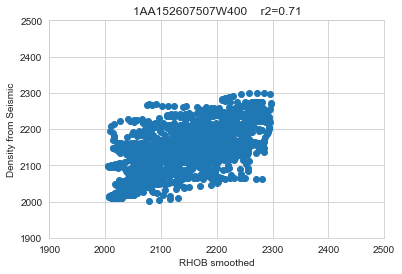

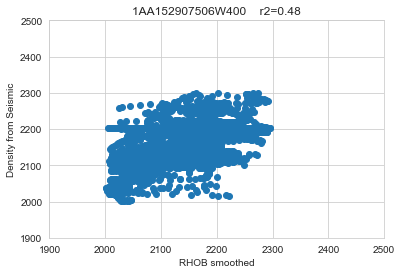

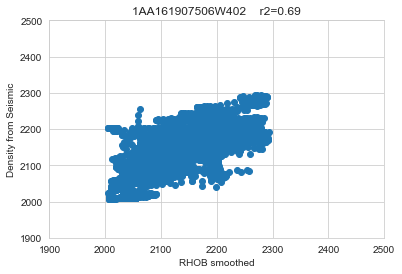

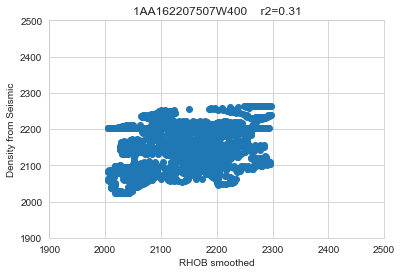

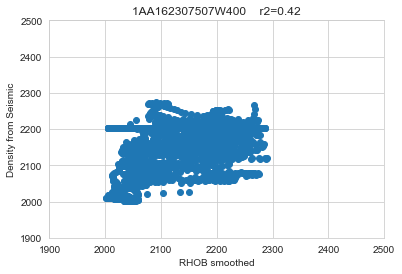

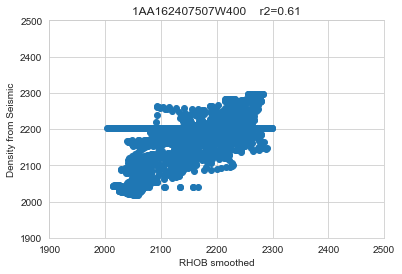

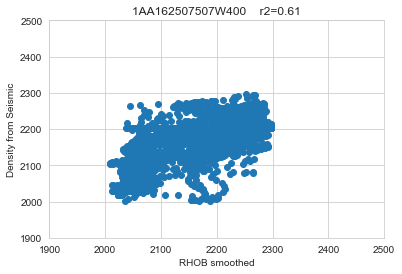

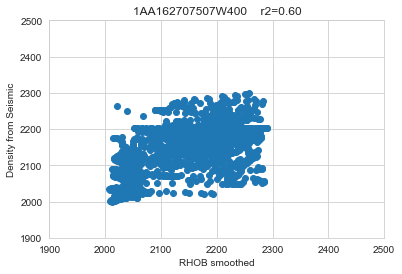

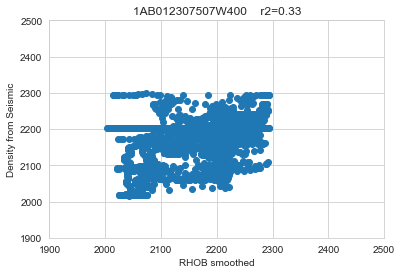

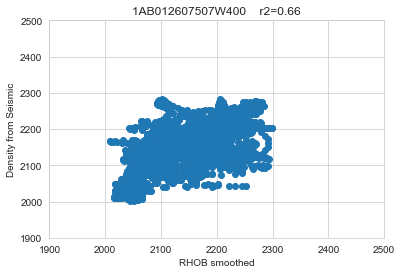

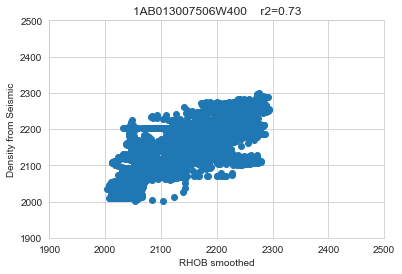

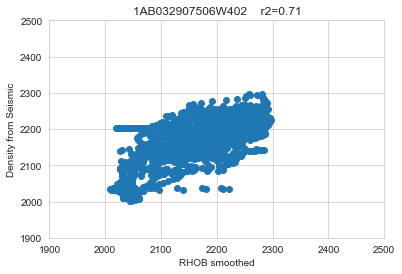

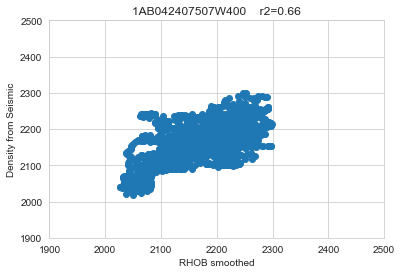

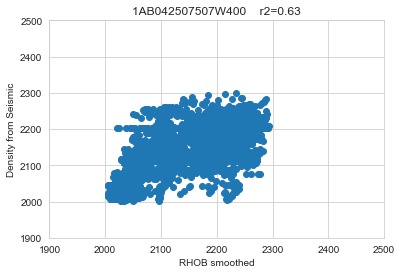

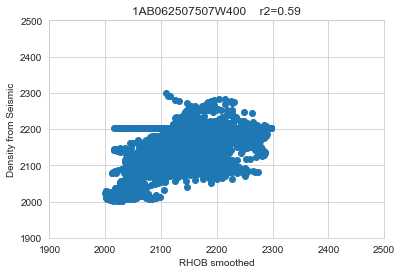

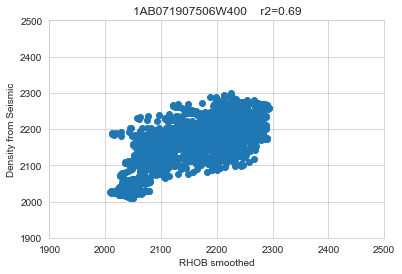

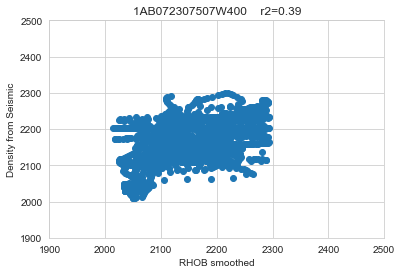

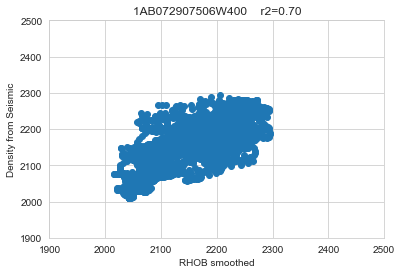

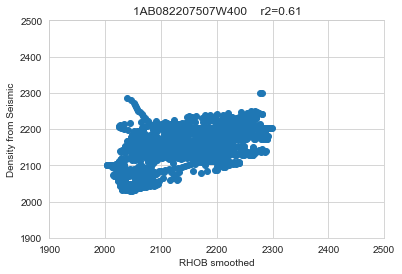

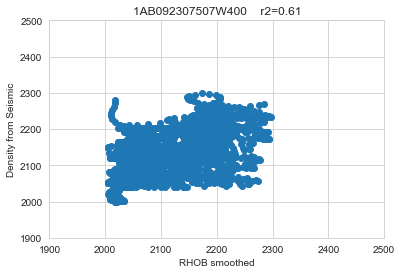

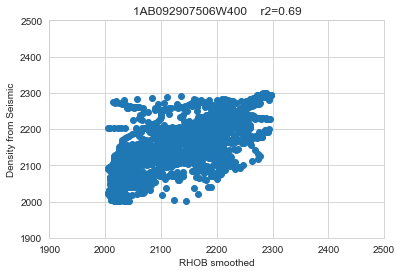

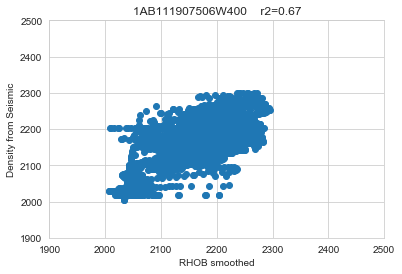

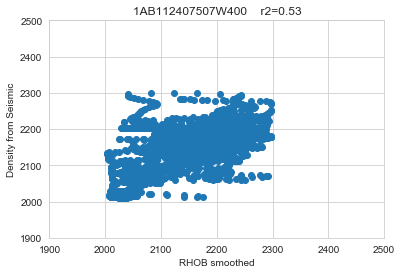

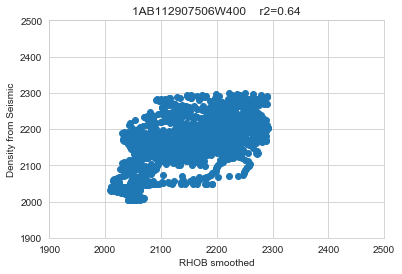

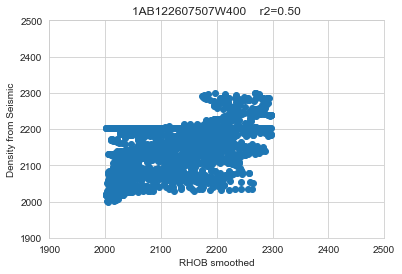

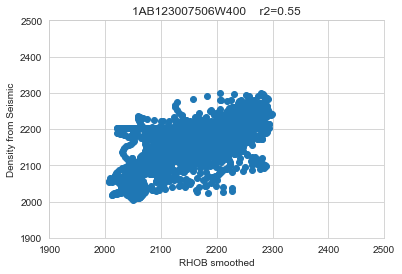

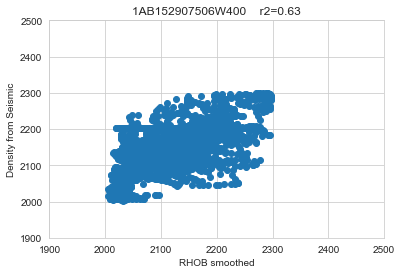

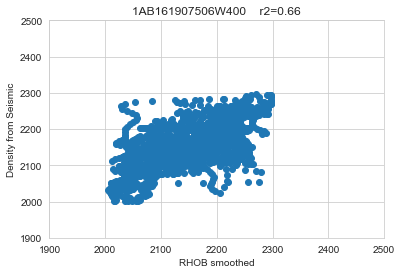

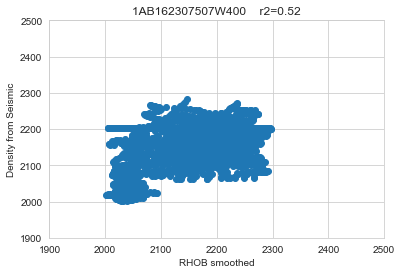

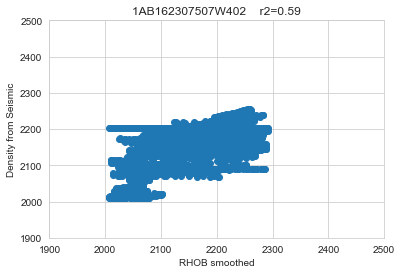

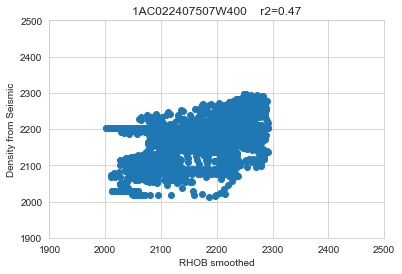

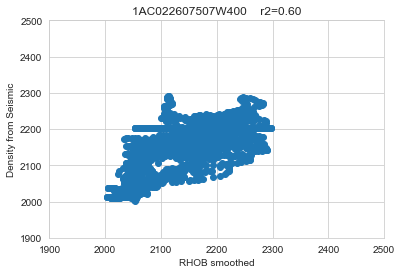

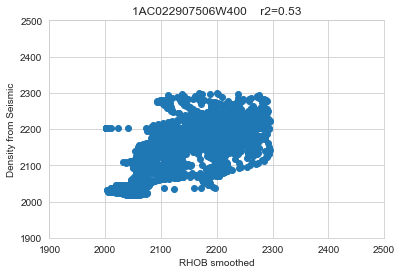

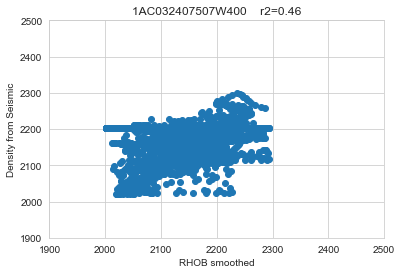

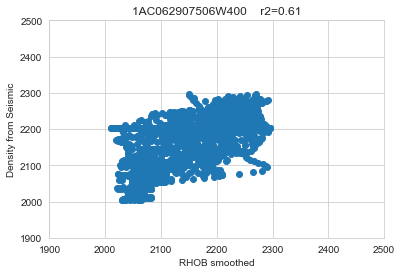

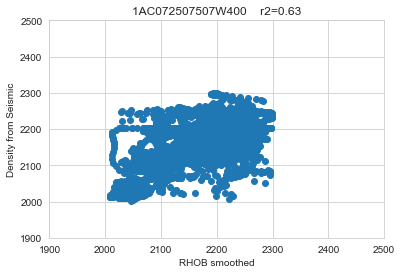

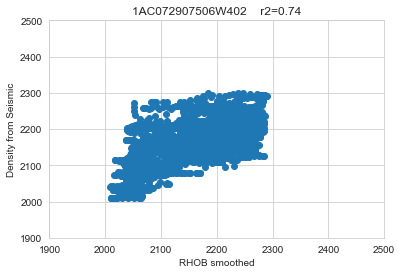

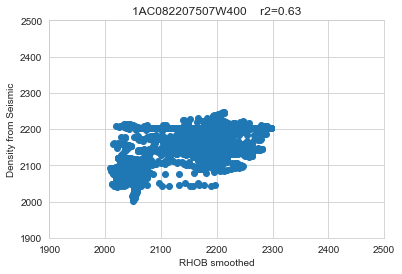

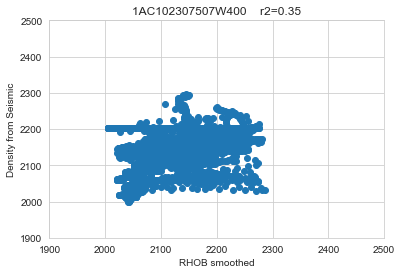

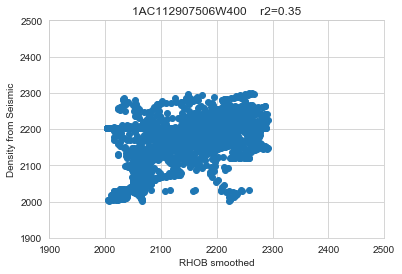

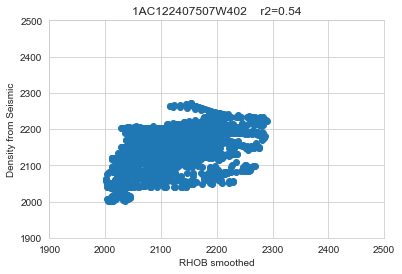

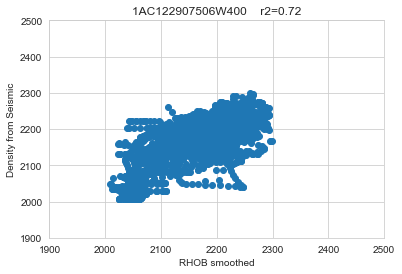

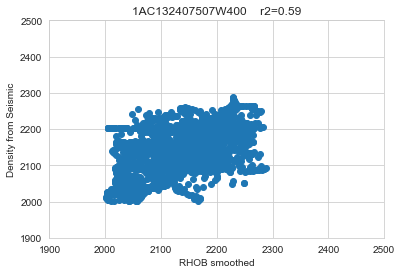

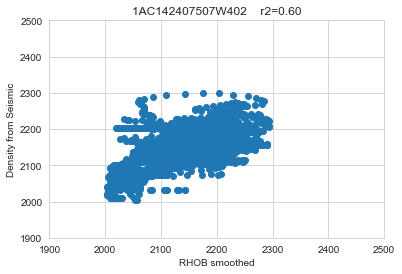

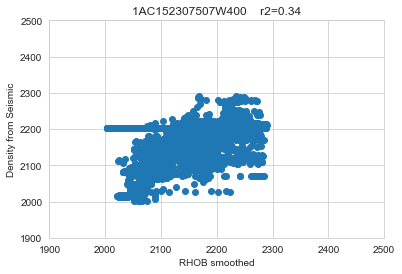

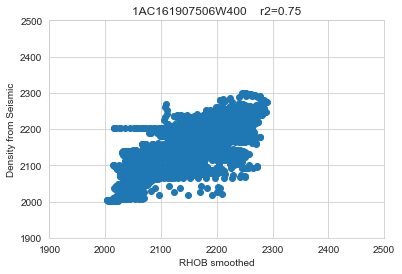

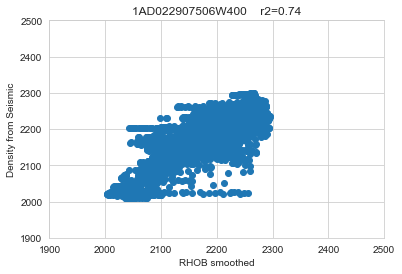

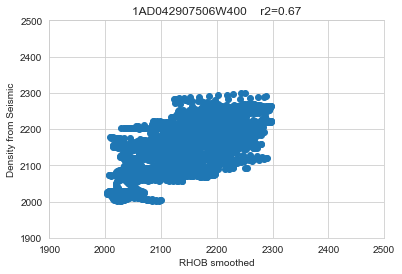

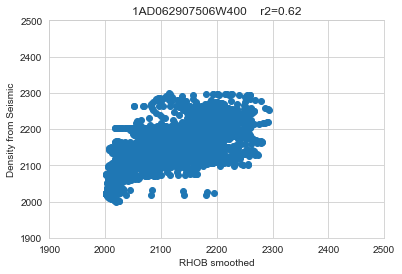

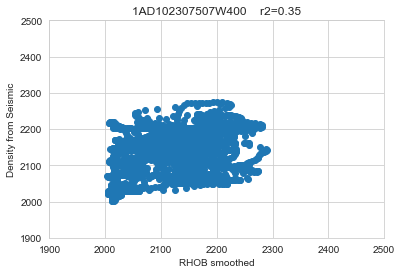

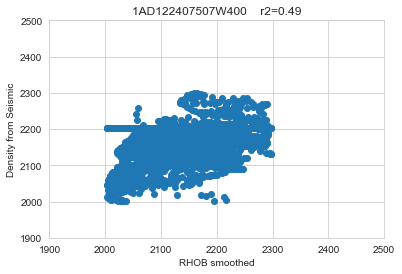

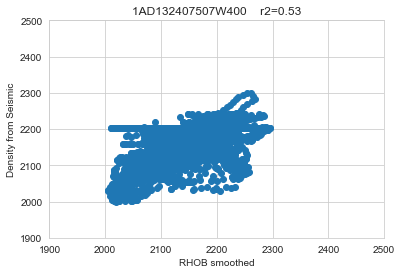

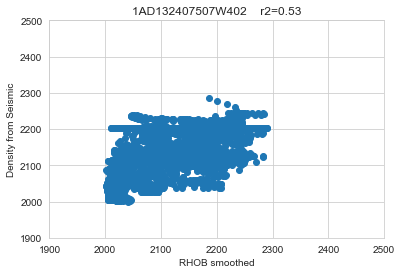

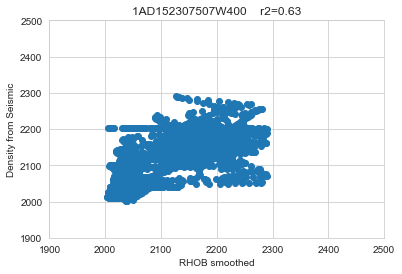

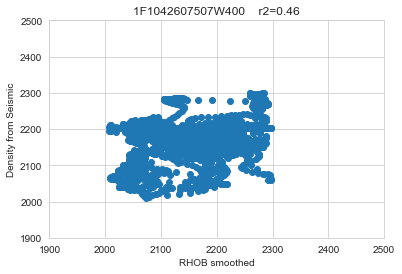

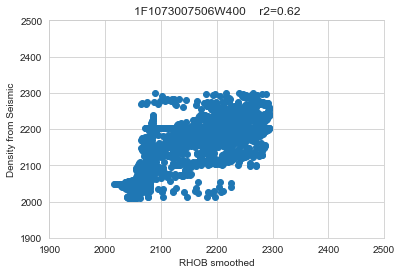

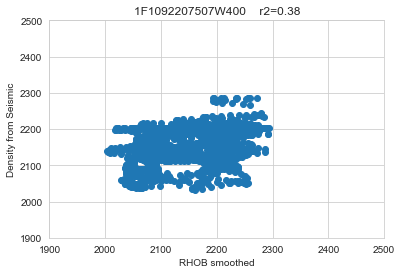

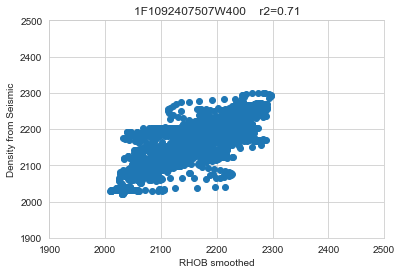

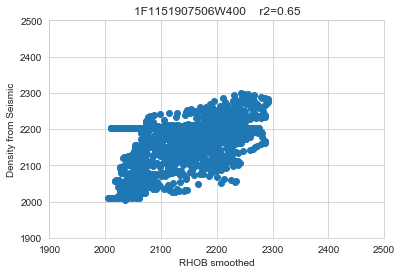

In [21]:
#location of files and set up dataframe
path = r'L:\D\DuncanF\JupyterNotebook\jf3las'
files= os.listdir(path)
result=DataFrame()


#work through the files

for file in files:
    #make a dataframe of the las
    las = lasio.read(os.path.join(path,file))
    df=las.df()
    #clean out the crap
    df=df.dropna()

# getting rid of unwanted values. Pay attention to scale! is is 1000 or 1.000? Also, pay attention to name of log in LAS
    
    df=df[df['RHOB'] >2000]
    df=df[df['DENSITY_SEISMIC_JF3'] >2000]
    df=df[df['DENSITY_SEISMIC_JF3'] <2300]
    df=df[df['RHOB'] <2300]
    
   
    #smoother    
    df['RHOBsmooth']=df['RHOB'].rolling(window=5, center=True).mean()
    df=df.dropna()
    
    
    

    #append the r2 and uwi to the dataframe

    rsquaredRHOBsmoothDenMLR = df['RHOBsmooth'].corr(df['DENSITY_SEISMIC_JF3'])
    rsquaredRHOBDenMLR = df['RHOB'].corr(df['DENSITY_SEISMIC_JF3'])

    
    result=result.append({'UWI':file.split('.')[0],'R2 RHOB Smooth DenMLR':rsquaredRHOBsmoothDenMLR,
                          'R2 RHOB DenMLR':rsquaredRHOBDenMLR }, ignore_index=True)
    
    plt.figure(file)
    plt.scatter(df['RHOBsmooth'], df['DENSITY_SEISMIC_JF3'])
    plt.rcParams.update({'figure.max_open_warning': 0})
    ax=plt.gca()
    plt.xlabel("RHOB smoothed")
    plt.ylabel("Density from Seismic")
    plt.ylim(1900, 2500)
    plt.xlim(1900, 2500)
    ax.set_title(file.split('.')[0] + "    r2=" +  "{:.2f}".format(df['RHOBsmooth'].corr(df['DENSITY_SEISMIC_JF3'])))
    #save the charts out
    #plt.savefig(file.split('.')[0])
    
#Save out the results dataframe as a csv
#result.to_csv(r'L:\D\DuncanF\JF3_R2v2_2000_2300.csv')
 
    